## I. WEB SCRAPING
At first, I will try to crawl data from a wikipedia page which contains data about largest companies in the US by revenue 

In [ ]:
from bs4 import BeautifulSoup 
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

url= "https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue"
page=requests.get(url)

soup=BeautifulSoup(page.text,"html")
print(soup) 

In [ ]:
# Find the suitable table in the Wikipedia page (The page has 3 tables and table needed is the first one) 
table = soup.find_all("table")[0]
print(table) 

In [4]:
# Create a list of the headers of the table chosen above. 
world_titles=table.find_all('th')
world_table_titles= [title.text.strip() for title in world_titles]
print(world_table_titles)

['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


In [5]:
#Create a DataFrame with the column names aligning with the Wiki table's names. 
my_table=pd.DataFrame(columns=world_table_titles)


In [6]:
# Crawl data in each row from the table chosen and put them into the DataFrame my_table I created before. 
row_data = table.find_all('tr')
print(len(row_data))
list_of_companies=[]
for index,row in enumerate(row_data): 
 if index!=0:     
    cells_in_row=row.find_all('td')
    individuals_row_data=[cell.text.strip() for cell in cells_in_row]
    length=len(my_table)
    my_table.loc[length]=individuals_row_data



101


## II. Cleansing and Transforming: 

In [7]:
# Change data type of each column to be suitable. 
my_table["Revenue growth"] = my_table["Revenue growth"].str.replace('%', '', regex=False)
my_table["Revenue growth"] = pd.to_numeric(my_table["Revenue growth"])
my_table["Revenue (USD millions)"] = my_table["Revenue (USD millions)"].str.replace(',', '', regex=False)
my_table["Revenue (USD millions)"] = pd.to_numeric(my_table["Revenue (USD millions)"])
my_table["Employees"] = my_table["Employees"].str.replace(',', '', regex=False)
my_table["Employees"] = pd.to_numeric(my_table["Employees"])

## III. Analysis: 
### 1.Company Level 
 

#### - Top Companies by Revenue

  Rank                  Name                        Industry  \
0    1               Walmart                          Retail   
1    2                Amazon      Retail and cloud computing   
2    3                 Apple            Electronics industry   
3    4    UnitedHealth Group                      Healthcare   
4    5    Berkshire Hathaway                    Conglomerate   
5    6            CVS Health                      Healthcare   
6    7            ExxonMobil              Petroleum industry   
7    8              Alphabet  Technology and cloud computing   
8    9  McKesson Corporation                          Health   
9   10               Cencora              Pharmacy wholesale   

   Revenue (USD millions)  Revenue growth  Employees  \
0                  648125             6.0    2100000   
1                  574785            11.9    1525000   
2                  383482            -2.8     161000   
3                  371622            14.6     440000   
4              

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_22452\4289566529.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(top_10_revenue["Name"])


[Text(0, 0, 'Walmart'),
 Text(0, 1, 'Amazon'),
 Text(0, 2, 'Apple'),
 Text(0, 3, 'UnitedHealth Group'),
 Text(0, 4, 'Berkshire Hathaway'),
 Text(0, 5, 'CVS Health'),
 Text(0, 6, 'ExxonMobil'),
 Text(0, 7, 'Alphabet'),
 Text(0, 8, 'McKesson Corporation'),
 Text(0, 9, 'Cencora')]

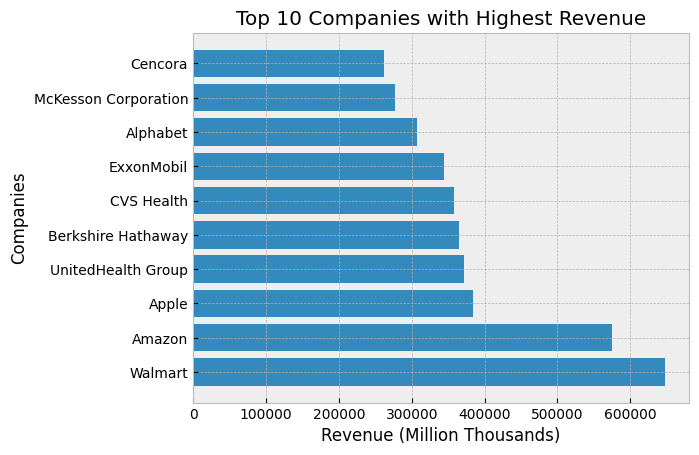

In [12]:
fig,ax=plt.subplots()
print(top_10_revenue)
ax.barh(top_10_revenue["Name"],top_10_revenue["Revenue (USD millions)"])
ax.set_xlabel("Revenue (Million Thousands)")
ax.set_ylabel("Companies")
ax.set_title("Top 10 Companies with Highest Revenue")
ax.set_yticklabels(top_10_revenue["Name"])

##### Insights: 
In 2024, Walmart is the public company having the highest revenue. This can be explained by several aspects, one of which is the fact that more affluent consumers are looking to save money, and they have been a key demographic in propelling the continued blockbuster growth of this retailer. Besides, Walmart's value proposition - offering a wide range of products at competitive prices - appeals broadly across income levels. This adaptability has allowed Walmart to capture and retain customers during economic fluctuations. Meanwhile, looking in top 10, companies come from two main industries: Health and Technology, which are two of the biggest industries by revenue in the US. While for health, demand remains consistent as healthcare is a fundamental necessity, tech field witnesses a boom with such innovations as AI and 5G. 

#### - Top Companies by Revenue Growth

                       Name  Revenue growth
64                   Nvidia           125.9
34            Goldman Sachs            57.8
20                Citigroup            55.1
11           JPMorgan Chase            54.7
17          Bank of America            49.4
40           Morgan Stanley            45.9
33              Wells Fargo            39.2
90    Capital One Financial            29.0
61  Progressive Corporation            25.2
35              Freddie Mac            24.6


Text(0.5, 1.0, 'Top 10 Companies with Highest Revenue Growth')

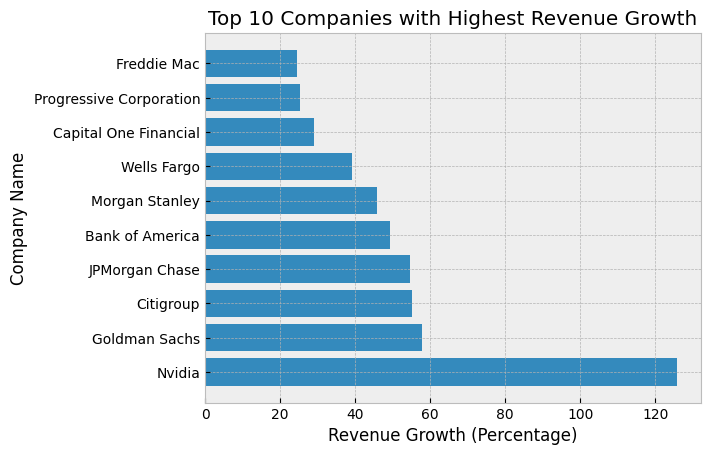

In [8]:
# Analyze under the aspect of Revenue Growth
growth_sort=my_table.sort_values("Revenue growth", ascending=False)
top_10_growth=growth_sort.iloc[:10]
print(top_10_growth.loc[:,["Name","Revenue growth"]])
plt.style.use("bmh")
fig1,ax1=plt.subplots()
ax1.barh(top_10_growth["Name"],top_10_growth["Revenue growth"])
ax1.set_xlabel("Revenue Growth (Percentage)")
ax1.set_ylabel("Company Name")
ax1.set_title("Top 10 Companies with Highest Revenue Growth")

##### Insights 
In 2024, companies which recorded a positive growth in revenue have an average increase of around 30%. Meanwhile, Nividia stands out since this giant in the semiconductor industry witnessed an over *120%* growth in their revenue, which is understandable. Firstly, the surging demand for AI and Machine Learning has been the primary driver behind this jump. NVIDIA is a leader as well as holds a dominant market position in high-performance GPUs, which are essential for running AI models, especially large language models and deep learning application. This helps them make an enormous profit from GPUs-selling. Besides, the accelerated adoption of cloud computing services also boosts this growth given that companies' migrating their infrastructure to the could always demand NVIDIA's GPUs, which power data center servers and cloud computing. ALl in all, this massive revenue growth reflects a unique convergence of factors including the rapid rise of AI, increasing data center demand and mostly the company's strategic expansions to capitalize this trend. 

#### Top Companies by Revenue in relation with Their Number of Employees 

                   Name  Employees  Revenue (USD millions)
0               Walmart    2100000                  648125
1                Amazon    1525000                  574785
2                 Apple     161000                  383482
3    UnitedHealth Group     440000                  371622
4    Berkshire Hathaway     396500                  364482
5            CVS Health     259500                  357776
6            ExxonMobil      61500                  344582
7              Alphabet     182502                  307394
8  McKesson Corporation      48000                  276711
9               Cencora      44000                  262173


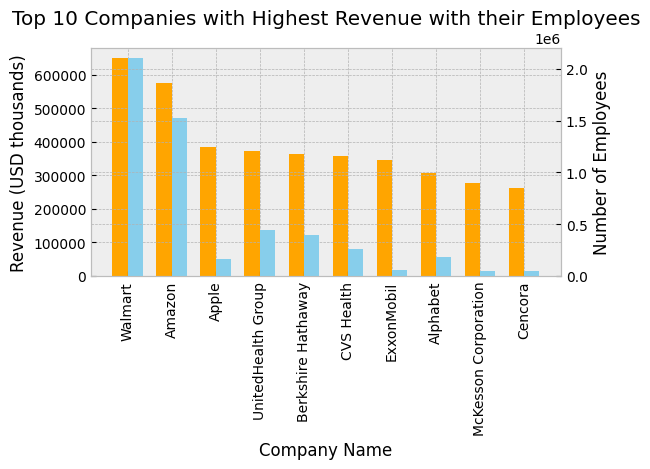

In [9]:
#Relationship between number of employees and Revenue of Companies 
revenue_sort=my_table.sort_values("Revenue (USD millions)", ascending=False)
top_10_revenue=revenue_sort.iloc[:10]
print(top_10_revenue.loc[:,["Name","Employees","Revenue (USD millions)"]])
fig2,ax2=plt.subplots()
ax2_twin=ax2.twinx()
x=np.arange(10)
width=0.35
bars1 = ax2.bar(x - width/2, top_10_revenue["Revenue (USD millions)"], width, label='Revenue', color='orange')
bars2 = ax2_twin.bar(x + width/2, top_10_revenue["Employees"], width, label='Number of Employees', color='skyblue')
ax2.set_xticks(x)
ax2.set_xticklabels(top_10_revenue["Name"], rotation =90)
ax2.set_xlabel("Company Name")
ax2.set_ylabel("Revenue (USD thousands)")
ax2.set_title("Top 10 Companies with Highest Revenue with their Employees")
ax2_twin.set_ylabel("Number of Employees")
plt.tight_layout()


### 2. Industry Level 

#### Top Industries with highest Revenues and highest Number of Companies in top 

                         Industry  Revenue (USD millions)
0                          Retail                 1615484
1                      Healthcare                 1324717
2                      Financials                 1279132
3              Petroleum industry                 1220316
4  Technology and cloud computing                  581169
             Industry  count
0          Financials     13
1              Retail     10
2  Petroleum industry      9
3          Healthcare      6
4          Technology      6


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_22452\143028464.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3[0].set_xticklabels(top_5["Industry"], rotation=45)


Text(0.5, 1.0, 'Top 5 Industries which have the most largest companies')

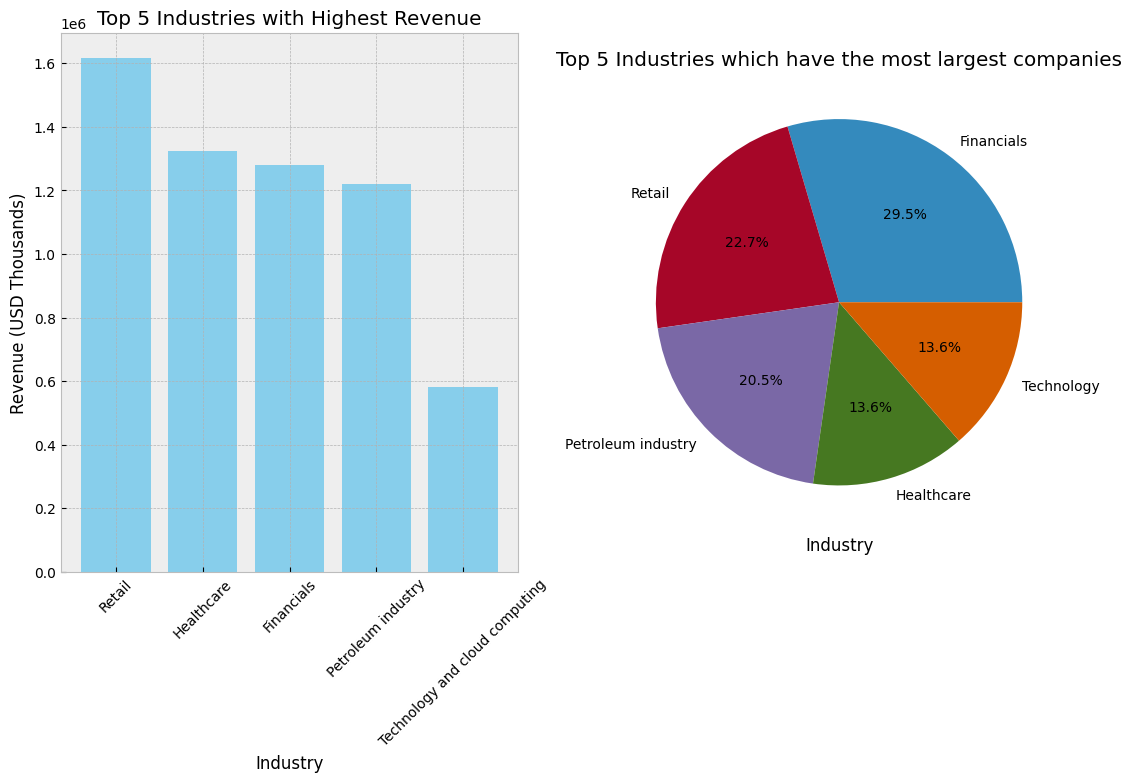

In [10]:
industry_revenue= my_table.groupby("Industry")["Revenue (USD millions)"].agg('sum').sort_values(ascending=False)
industry_revenue_df=industry_revenue.reset_index()
top_5=industry_revenue_df.iloc[:5]
print(top_5)
fig3,ax3=plt.subplots(1,2, figsize=(13,7))
ax3[0].bar(top_5["Industry"], top_5["Revenue (USD millions)"], color="skyblue")
ax3[0].set_xlabel("Industry")
ax3[0].set_ylabel("Revenue (USD Thousands)")
ax3[0].set_title("Top 5 Industries with Highest Revenue")
ax3[0].set_xticklabels(top_5["Industry"], rotation=45)
industry_count= my_table["Industry"].value_counts()
industry_count_df=industry_count.reset_index()
top_5_count=industry_count_df.iloc[:5]
print(top_5_count)
ax3[1].pie( top_5_count["count"], labels=top_5_count["Industry"],autopct='%1.1f%%')
ax3[1].set_xlabel("Industry")
ax3[1].set_title("Top 5 Industries which have the most largest companies")



##### Insight 
Obviously, Retail industry isn't just pulling in the most revenue, it’s a huge economic driver, likely due to the widespread, everyday demand from consumers. This strong revenue performance aligns with the numbers of retailers positioning in the list, taking up 22.7% of the top players. Though tt’s not as dominant as financials, which lead with nearly 30% of the largest companies, this industry’s influence is clear.

Meanwhile, healthcare and financials are close behind retail in terms of revenue, meaning a considerable contribution to the GPDs of the economy. Healthcare’s high revenue probably speaks to the ongoing and stable demand for medical services, whereas financials generate massive revenue through investments, loans, and other services. The presence of financials as the top category by number of large companies makes sense, given the diversity and scale of financial institutions, from banks to insurance giants.

Interestingly, while the petroleum industry doesn’t top the revenue chart, it still commands a significant portion (20.5%) of the largest companies, showing how critical it is even if the sector’s revenues are more cyclical and resource-dependent. Technology has a smaller footprint by both revenue and company size compared to these other sectors, yet its rapid growth and innovation potential keep it as a competitive and valuable industry.

### 3. Region Analysis

#### Number of Large Companies By Regions

      Region  count
0      South     36
1  Northeast     26
2    Midwest     24
3       West     14
      Region  Revenue (USD millions)
3       West                 2413739
1  Northeast                 2704827
0    Midwest                 2985288
2      South                 4130755


Text(0, 0.5, 'Revenue (USD thousands)')

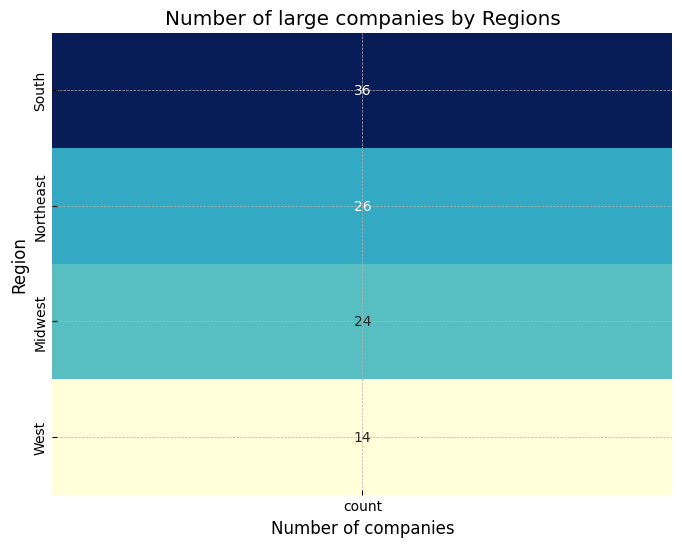

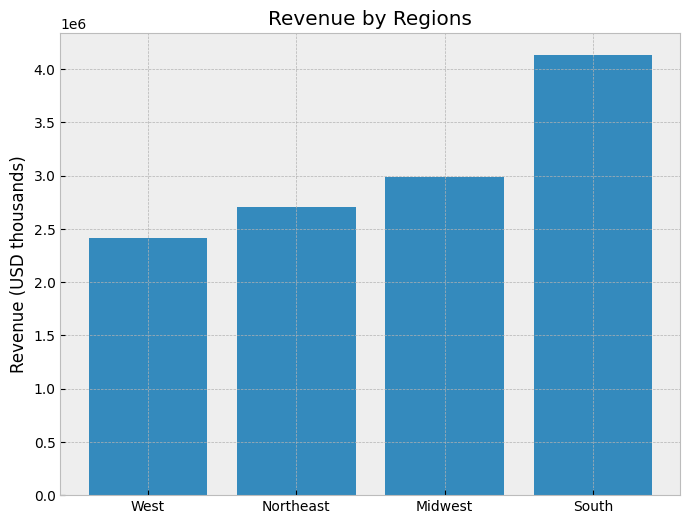

In [27]:
state_to_region = {
    'Connecticut': 'Northeast',
    'Maine': 'Northeast',
    'Massachusetts': 'Northeast',
    'New Hampshire': 'Northeast',
    'Rhode Island': 'Northeast',
    'Vermont': 'Northeast',
    'New Jersey': 'Northeast',
    'New York': 'Northeast',
    'Pennsylvania': 'Northeast',
    
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Michigan': 'Midwest',
    'Ohio': 'Midwest',
    'Wisconsin': 'Midwest',
    'Iowa': 'Midwest',
    'Kansas': 'Midwest',
    'Minnesota': 'Midwest',
    'Missouri': 'Midwest',
    'Nebraska': 'Midwest', 
    'North Dakota': 'Midwest',
    'South Dakota': 'Midwest',
    
    'Delaware': 'South',
    'Florida': 'South',
    'Georgia': 'South',
    'Maryland': 'South',
    'North Carolina': 'South',
    'South Carolina': 'South',
    'Virginia': 'South',
    'West Virginia': 'South',
    'District of Columbia': 'South',
    'Alabama': 'South',
    'Kentucky': 'South',
    'Mississippi': 'South',
    'Tennessee': 'South',
    'Arkansas': 'South',
    'Louisiana': 'South',
    'Oklahoma': 'South',
    'Texas': 'South',
    
    'Arizona': 'West',
    'Colorado': 'West',
    'Idaho': 'West',
    'Montana': 'West',
    'Nevada': 'West',
    'New Mexico': 'West',
    'Utah': 'West',
    'Wyoming': 'West',
    'Alaska': 'West',
    'California': 'West',
    'Hawaii': 'West',
    'Oregon': 'West',
    'Washington': 'West', 
    "D.C." : "South"
}
my_table["State"] = my_table["Headquarters"].apply(lambda x: x.split(", ")[-1])
my_table["Region"]=my_table["State"].map(state_to_region)
region_count= my_table["Region"].value_counts()
region_count_df=region_count.reset_index()
print(region_count_df)
region_count_df = region_count_df.set_index('Region')
plt.figure(figsize=(8, 6))
sns.heatmap(region_count_df, annot=True, cmap='YlGnBu', cbar=False, fmt="d")
plt.xlabel("Number of companies")
plt.title("Number of large companies by Regions")
region_sum=my_table.groupby("Region")["Revenue (USD millions)"].agg("sum").reset_index().sort_values("Revenue (USD millions)")
print(region_sum)
plt.figure(figsize=(8,6))
plt.bar(region_sum["Region"],region_sum["Revenue (USD millions)"])
plt.title("Revenue by Regions")
plt.ylabel("Revenue (USD thousands)")





##### Insight 
 the South has a dominant share of large companies—36 of them—compared to other regions, with the West trailing at only 14. The high number in the South might be due to several factors. For one, the South has lower costs for both labor and real estate, which makes it an attractive location for corporate headquarters and operations. Such States as Texas, Florida, and Georgia, which offer favorable tax policies and business incentives, play a big role in this.

On the other hand, the West, despite being home to major tech hubs like Silicon Valley, has fewer large companies overall. High costs of living, especially in California, along with stricter regulations and higher taxes, can deter companies from setting up their main offices or expanding significantly in the region. Additionally, companies in the West may be more innovation-focused and in emerging sectors, which might not yet reflect in sheer numbers compared to the more established industries in the South. So while the West has an outsized influence in tech and innovation, the South leads in the sheer count of large companies.